In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [27]:
df = pd.read_csv('/content/Admission_data.csv')

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Serial No.   | GRE Score   | TOEFL Score   | University Rating   | SOP   | LOR    | CGPA   | Research   | Chance of Admit    |
|:-------------|:------------|:--------------|:--------------------|:------|:-------|:-------|:-----------|:-------------------|
| 1            | 337         | 118           | 4                   | 4.5   | 4.5    | 9.65   | 1          | 0.92               |
| 2            | 324         | 107           | 4                   | 4     | 4.5    | 8.87   | 1          | 0.76               |
| 3            | 316         | 104           | 3                   | 3     | 3.5    | 8      | 1          | 0.72               |
| 4            | 322         | 110           | 3                   | 3.5   | 2.5    | 8.67   | 1          | 0.8                |
| 5            | 314         | 103           | 2                   | 2     | 3      | 8.21   | 0          | 0.65               |


In [28]:
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


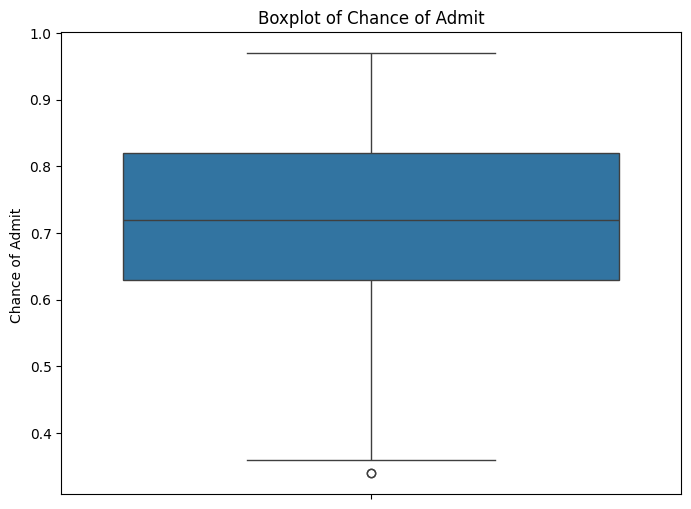

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Chance of Admit '])
plt.title('Boxplot of Chance of Admit')
plt.show()

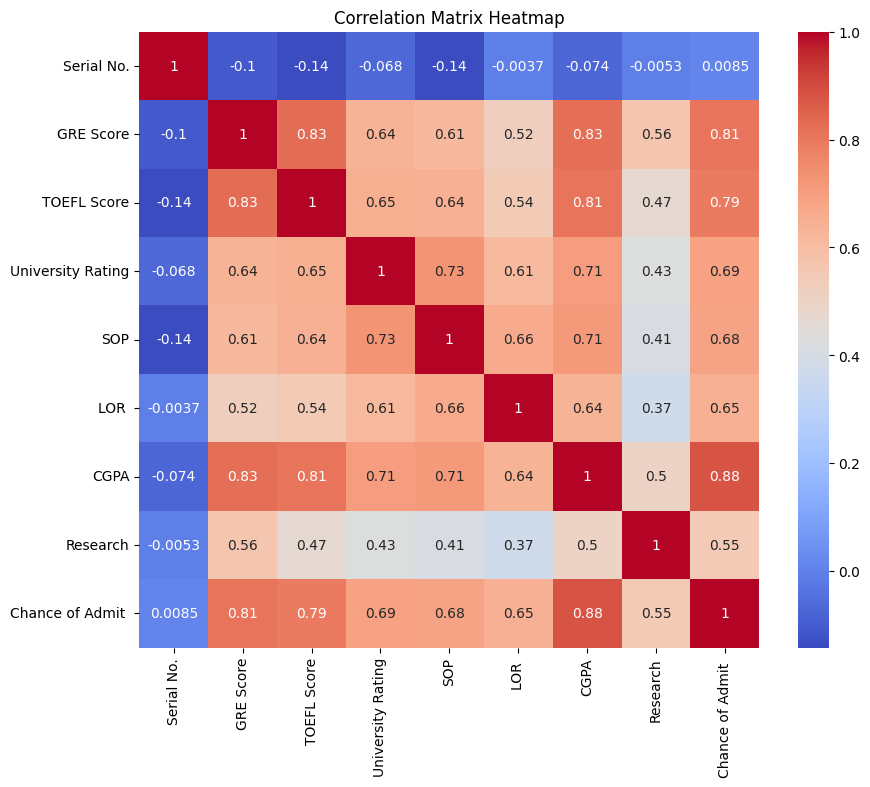

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

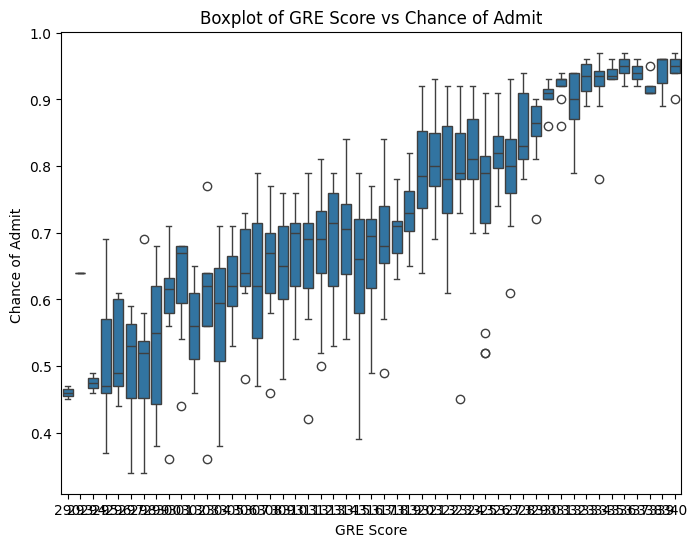

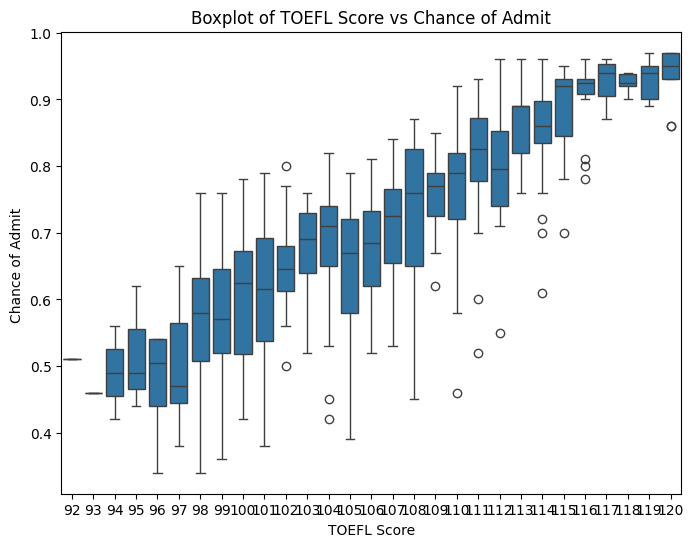

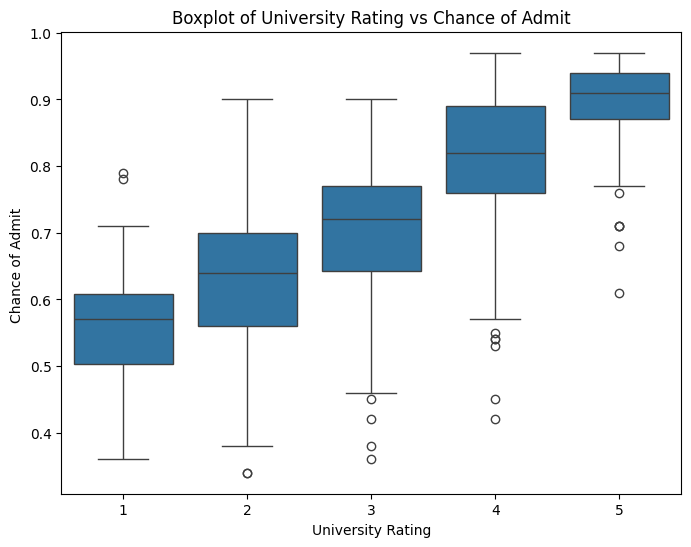

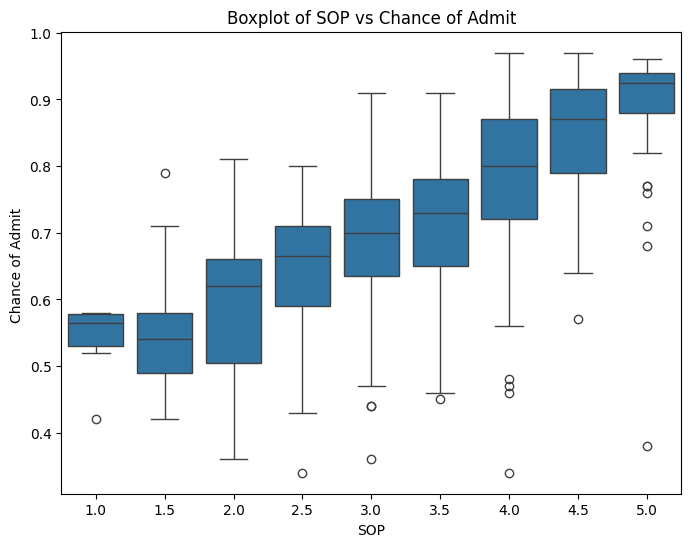

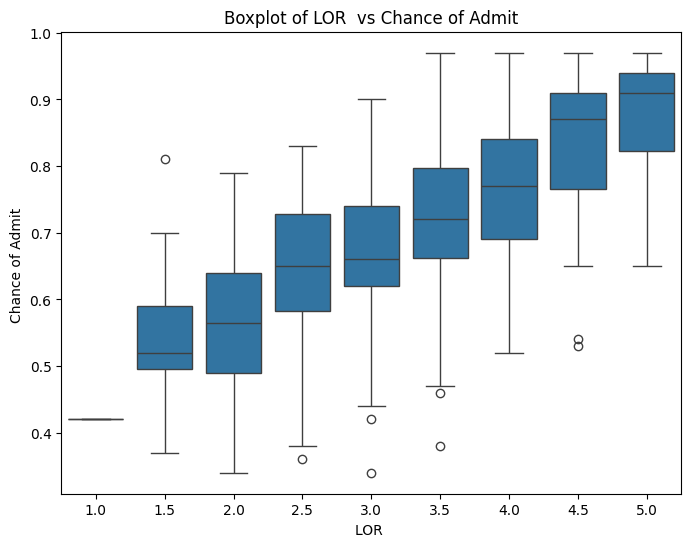

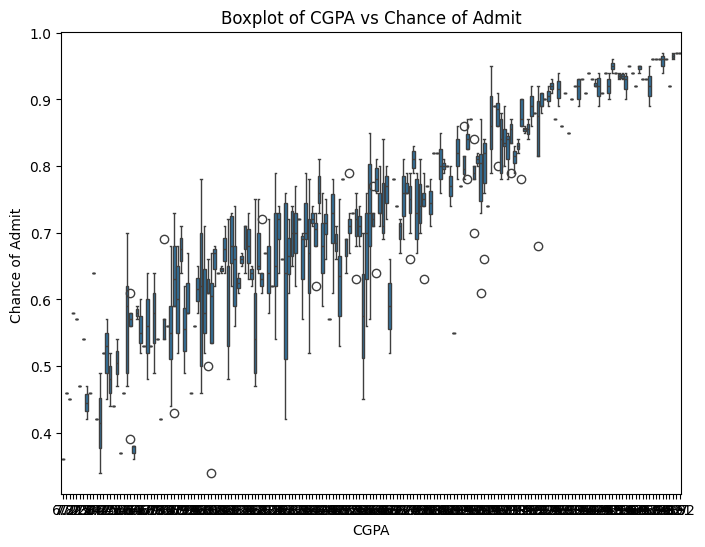

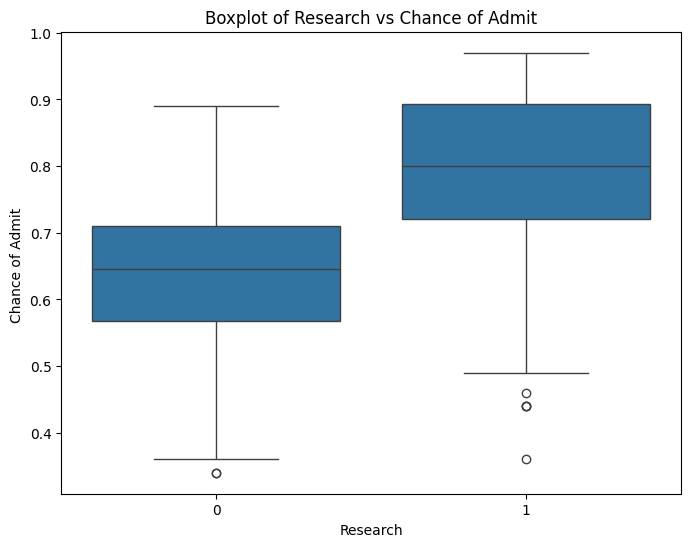

In [31]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], y=df['Chance of Admit '])
    plt.title(f'Boxplot of {feature} vs Chance of Admit')
    plt.show()

***The correlational analysis can have a significant effect on feature selection. The correlation matrix shows that some features are highly correlated with each other e.g., GRE Score and TOEFL Score, CGPA and University Rating. This indicates that these features carry similar information. Including all of them in the model can lead to multicollinearity, which can destabilize the model and make it difficult to interpret the importance of individual features. Feature selection techniques can help identify and remove redundant features, improving model efficiency and interpretability.***

In [32]:
# Outlier handling using IQR
for col in ['GRE Score', 'TOEFL Score', 'CGPA']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

**Handling Missing Values:** The initial data check revealed no missing values in the dataset. Therefore, no imputation techniques were required.
**Handling Outliers:** Outliers were identified and handled in the GRE Score, TOEFL Score, and CGPA columns using the IQR method. Values outside the 1.5x IQR were winsorized to the nearest boundary to reduce the influence of extreme values.
**Feature Encoding:** No explicit feature encoding was performed as the dataset primarily contained numerical features. The Research column, which is binary (0 or 1), was already in a suitable format for modeling.
**Skewed Data:** No specific transformations were applied to address skewed data. The standardization step using StandardScaler helps to center and scale the features, indirectly mitigating the impact of skewness.

In [33]:
# Feature scaling (standardization)
scaler = StandardScaler()
numerical_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

**Feature Engineering:** No explicit feature engineering techniques were applied in this case. The existing features were deemed sufficient for building the prediction models. However, in a real-world scenario, one could explore creating interaction terms or polynomial features to capture potential non-linear relationships between the features and the target variable.
**Feature Transformation:** Standardization was applied to all numerical features using StandardScaler. This transforms the data to have zero mean and unit variance, ensuring that all features contribute equally to the model and preventing features with larger values from dominating. This step is crucial for models like Logistic Regression and Decision Tree, which can be sensitive to the scale of the features.

In [34]:
# Splitting the data into training and testing sets (80/20 ratio)
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Convert 'Chance of Admit' to binary
y_train_binary = (y_train > 0.5).astype(int)

In [36]:
# Train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train_binary)

LogisticRegression(random_state=42)

In [37]:
# Train Decision Tree model with GridSearchCV for hyperparameter tuning
dtree = DecisionTreeClassifier(random_state=42)
# Train Decision Tree model with GridSearchCV for hyperparameter tuning
dtree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10] # tests different minimum numbers of samples required to split an internal node. Increasing this value can also help prevent overfitting
}
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')
#This uses 5-fold cross-validation. The training data is split into 5 parts. The model is trained on 4 parts and validated on the 5th. This is repeated 5 times, each time with a different part as the validation set. This helps to get a more robust estimate of the model's performance.
grid_search.fit(X_train, y_train_binary)
best_dtree = grid_search.best_estimator_
grid_search.fit(X_train, y_train_binary)
best_dtree = grid_search.best_estimator_

Standardization is chosen over normalization (e.g., Min-Max scaling) for the following reasons:

**Robustness to Outliers:** Standardization is less affected by outliers compared to normalization. Since outliers were already handled using IQR, standardization further ensures that the scaled data remains robust to any remaining extreme values.
**Preserving Distribution:** Standardization maintains the original distribution of the data, including the presence of any potential skewness. This can be beneficial for models that make assumptions about the data distribution.
**Interpretability:** Standardized features retain their original units, making it easier to interpret the coefficients or feature importance scores in the models.

In [38]:
# Print the best hyperparameters
print("Best hyperparameters for Decision Tree:", grid_search.best_params_)

Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}


In [39]:
# Convert 'Chance of Admit' to binary for the test set
y_test_binary = (y_test > 0.5).astype(int)

In [40]:
# Predict using Logistic Regression
y_pred_logreg = logreg.predict(X_test)

In [41]:
# Predict using Decision Tree
y_pred_dtree = best_dtree.predict(X_test)

In [42]:
# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logreg))
print("Precision:", precision_score(y_test_binary, y_pred_logreg))
print("Recall:", recall_score(y_test_binary, y_pred_logreg))
print("F1-score:", f1_score(y_test_binary, y_pred_logreg))
print("ROC-AUC score:", roc_auc_score(y_test_binary, y_pred_logreg))

Logistic Regression Metrics:
Accuracy: 0.95
Precision: 0.9479166666666666
Recall: 1.0
F1-score: 0.9732620320855615
ROC-AUC score: 0.7222222222222222


In [43]:
# Evaluate Decision Tree
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_dtree))
print("Precision:", precision_score(y_test_binary, y_pred_dtree))
print("Recall:", recall_score(y_test_binary, y_pred_dtree))
print("F1-score:", f1_score(y_test_binary, y_pred_dtree))
print("ROC-AUC score:", roc_auc_score(y_test_binary, y_pred_dtree))


Decision Tree Metrics:
Accuracy: 0.92
Precision: 0.9560439560439561
Recall: 0.9560439560439561
F1-score: 0.9560439560439561
ROC-AUC score: 0.7557997557997559


The Logistic Regression model appears to be the better choice for this particular prediction task due to its higher overall accuracy and strong performance across various metrics. It achieved an accuracy of 0.95, compared to 0.92 for the Decision Tree model.

The Decision Tree model's slightly higher ROC-AUC score (0.76 compared to 0.72) suggests it might be better at discriminating between positive and negative cases, even though its overall accuracy is slightly lower. However, the Logistic Regression model's superior performance in other metrics, including precision, recall, and F1-score, makes it a more suitable choice for this prediction task.

The Logistic Regression model's ability to effectively capture linear relationships between the features and the probability of admission likely contributes to its better performance. In this dataset, the relationships between the features and the target variable might be predominantly linear, favoring the Logistic Regression model.

While the Decision Tree model has its strengths, the Logistic Regression model's higher accuracy and strong performance across various metrics make it the better overall model for this admission prediction task.

PART 2

In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train_binary)
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

#Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train_binary)
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

#K Nearest Neighbors
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train_binary)
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

#Evaluation Gradient Boost
print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_gb))
print("Precision:", precision_score(y_test_binary, y_pred_gb))
print("Recall:", recall_score(y_test_binary, y_pred_gb))
print("F1-score:", f1_score(y_test_binary, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test_binary, y_pred_gb))

#Evaluation of K Nearest Neighbors
print("\nK Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_knn))
print("Precision", precision_score(y_test_binary, y_pred_knn))
print("Recall:", recall_score(y_test_binary, y_pred_knn))
print("F1-score:", f1_score(y_test_binary, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test_binary, y_pred_knn))

#Evaluation of Random Forest
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))
print("Precision:", precision_score(y_test_binary, y_pred_rf))
print("Recall:", recall_score(y_test_binary, y_pred_rf))
print("F1-score:", f1_score(y_test_binary, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test_binary, y_pred_rf))

Gradient Boosting Metrics:
Accuracy: 0.96
Precision: 0.9578947368421052
Recall: 1.0
F1-score: 0.978494623655914
ROC-AUC Score: 0.7777777777777778

K Nearest Neighbors Metrics:
Accuracy: 0.93
Precision 0.9285714285714286
Recall: 1.0
F1-score: 0.9629629629629629
ROC-AUC Score: 0.6111111111111112

Random Forest Metrics:
Accuracy: 0.96
Precision: 0.9578947368421052
Recall: 1.0
F1-score: 0.978494623655914
ROC-AUC Score: 0.7777777777777778
